In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import util.functions as funcs

np.random.seed = 10

[*********************100%***********************]  1 of 1 completed


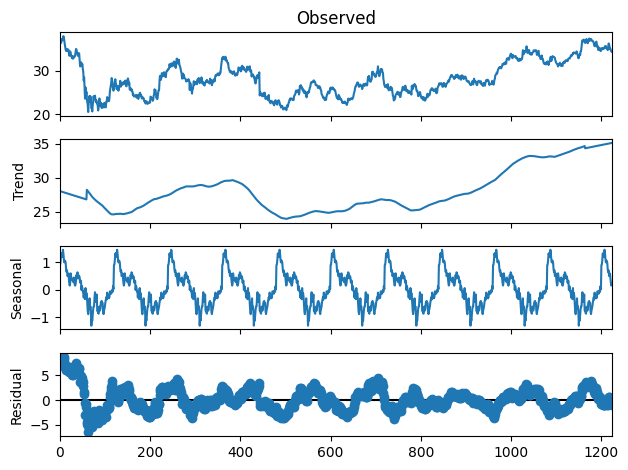

In [5]:
EMPRESA = 'ITUB4.SA'

df_full = funcs.get_data_ticker(EMPRESA, period='5y')
df = df_full.dropna()

dates, X, y = funcs.split_df_X_y(df)

result = seasonal_decompose(y, period=120, extrapolate_trend='freq')

trend = result.trend

result.plot()
plt.show()

In [3]:
data_hist = pd.DataFrame()
data_hist['trend'] = trend

data_hist['mm5'] = data_hist['trend'].rolling(5).mean()
data_hist['mm15'] = data_hist['trend'].rolling(15).mean()
data_hist['mm30'] = data_hist['trend'].rolling(30).mean()

data_hist = data_hist.dropna()

X = data_hist.iloc[:, 1:]
y = data_hist.iloc[:, 0]

pctTreino = .8

X_train, y_train = X.iloc[:int(len(X) * pctTreino)], y.iloc[:int(len(y) * pctTreino)]  
X_test, y_test = X.iloc[int(len(X) * pctTreino):], y.iloc[int(len(y) * pctTreino):]   

Parâmetro C = 0.1
r2: 0.3677535448100844

mae: 0.3398895801927894

mse: 0.17960566366266445

Parâmetro C = 1.1
r2: 0.566383958722979

mae: 0.5421556081262159

mse: 0.3423727004752186

Parâmetro C = 2.1
r2: 0.38850403130986255

mae: 1.2215673556340043

mse: 2.4949049450119576

Parâmetro C = 3.1
r2: -0.8462855187293254

mae: 2.170164930675758

mse: 5.669589580206671

Parâmetro C = 4.1
r2: -12.12593884863636

mae: 6.627057480244088

mse: 50.32480225172059

Parâmetro C = 5.1
r2: -0.33421355460480107

mae: 3.1564367823451818

mse: 14.629540802224168

Parâmetro C = 6.1
r2: -2.829741780416088

mae: 3.188257529369837

mse: 11.562667792648215

Parâmetro C = 7.1
r2: -5.910904319646551

mae: 3.942474978959146

mse: 17.790684457845977

Parâmetro C = 8.1
r2: -16.96341673930716

mae: 13.585458518529906

mse: 190.7844064762586

Parâmetro C = 9.1
r2: -1.2562733325635045

mae: 2.1692072040432184

mse: 6.450522344141109



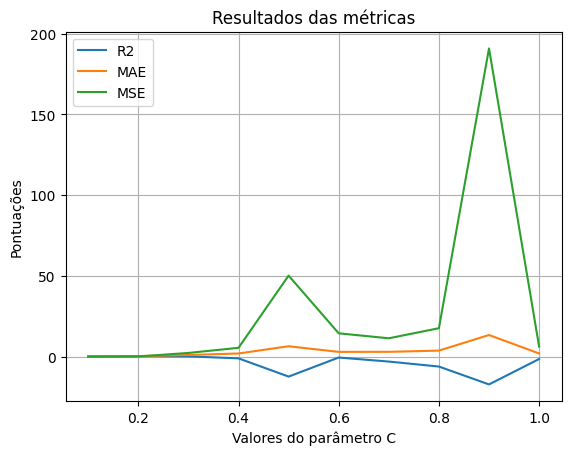

In [23]:
r2s = []
maes = []
mses = []

for i in range(1, 101, 10):    
    i = i/10 
    svr = SVR(C=i, kernel='poly')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)    

    r2 = r2_score(y_pred, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    
    r2s.append(r2)
    maes.append(mae)
    mses.append(mse)
    
    print(f"Parâmetro C = {i}")
    print(f"r2: {r2}\n")
    print(f"mae: {mae}\n")
    print(f"mse: {mse}\n")
    

# Valores para o eixo x 
x_values = [i * 0.1 for i in range(1, 11)]

plt.plot(x_values, r2s, label='R2')
plt.plot(x_values, maes, label='MAE')
plt.plot(x_values, mses, label='MSE')

# Adicionando rótulos aos eixos
plt.xlabel('Valores do parâmetro C')
plt.ylabel('Pontuações')
plt.title('Resultados das métricas')
plt.legend()  
plt.grid(True)
plt.show()  


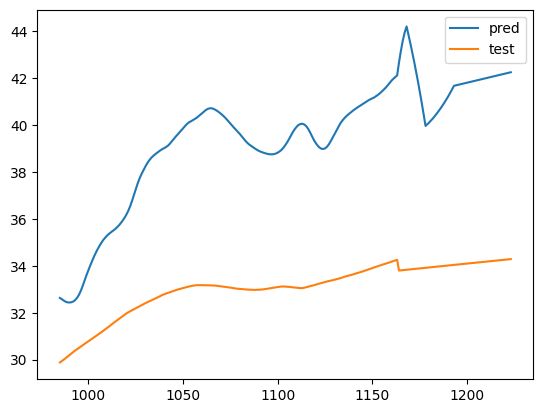

R2: -37.19149127097623
MAE: 6.359730074985935
MSE: 43.07174100542334


In [5]:
svr = SVR(kernel='poly', C=1)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

# Alinha o índice de y_pred com o de y_test
y_pred = pd.Series(y_pred, index=y_test.index)

plt.plot(y_pred, label='pred')
plt.plot(y_test, label='test')
plt.legend()
plt.show()

print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

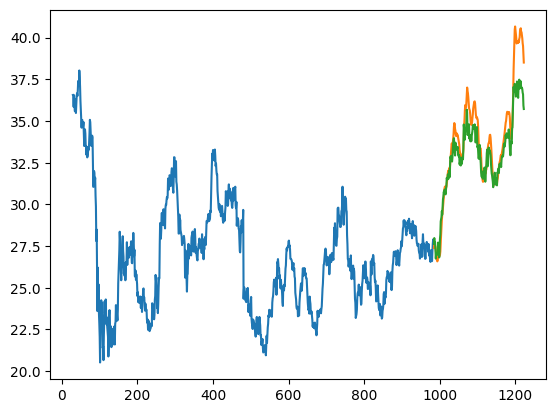

In [6]:
# Alinha o índice de y_pred com o de y_test
y_pred = pd.Series(y_pred, index=y_test.index)

plt.plot(y_train)
plt.plot(y_pred)
plt.plot(y_test)